# Export from river

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single 

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from seaborn import xkcd_rgb as xcolor
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [4]:
def convert_list(dt):
        temp = np.zeros(len(dt))
        for i in range(len(dt)):
            temp[i] = datetime2datenum_single(dt[i])
        return temp

In [5]:
def daily2monmean(dt, data):
    '''
    =======================================================================
    Convert data in days to monthly mean series
                            ----- created on 2014/12/25, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
        data_dt, series, bin_count = daily2monmean(...)
    -----------------------------------------------------------------------
    Input:
            dt: A list of original data's datetime.datetime objects
            data: original data
    Output:
            data_dt: A list of monmean datetime.datetime objects
            data: monmean data
            bin_count: how many points fall into each months, 
                        data[i]=np.nan when bin_count[i]=0.
    ======================================================================= 
    '''
    import datetime
    import numpy as np
    from dateutil.relativedelta import relativedelta
    
    dt=sorted(dt) # increase order
    # Calculate the length of series
    L=(dt[-1].year-dt[0].year+1)*12
    series=np.zeros(L)
    bin_count=np.zeros(L)
    # Bin data points
    for i in range(len(dt)):
        hit=(dt[i].year-dt[0].year)*12+dt[i].month
        series[hit-1] += data[i] # "-1" because it is Python
        bin_count[hit-1] += 1 # count    
    for i in range(L):
        if bin_count[i] > 0:
            series[i]=series[i]/bin_count[i]
        if bin_count[i] == 0:
            series[i]=np.nan            
    # generate a corresponding datetime series
    data_dt=[datetime.datetime(dt[0].year, 01, 01)]
    step=relativedelta(months=1)    
    for i in range(L-1): # don't know why but it needs L-1, or the size will missmatch
        temp=data_dt[i]
        temp += step
        data_dt.append(temp)
    
    return data_dt, series, bin_count

In [6]:
def seasonal_character(dt, data):
    '''
    =======================================================================
    bin daily data into 12 months
                            ----- created on 2014/12/25, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
        series, bin_count = seasonal_character(...)
    -----------------------------------------------------------------------
    Input:
            dt: A list of original data's datetime.datetime objects
            data: original data
    Output:
            data: data in 12 months
            bin_count: how many points fall into each months, 
                        data[i]=np.nan when bin_count[i]=0.
    ======================================================================= 
    '''
    #import datetime
    import numpy as np
    #from dateutil.relativedelta import relativedelta
    
    dt=sorted(dt) # increase order
    series=np.zeros(12)
    bin_count=np.zeros(12)
    # Bin data points
    for i in range(len(dt)):
        hit=dt[i].month
        series[hit-1] += data[i] # "-1" because it is Python
        bin_count[hit-1] += 1 # count    
    for i in range(12):
        if bin_count[i] > 0:
            series[i]=series[i]/bin_count[i]
        if bin_count[i] == 0:
            series[i]=np.nan        
    return series, bin_count

In [7]:
def int_between(begin, end, num_between):
    '''
    =======================================================================
    Use linear interpolation get values (equally distributed) between knowns
                            ----- created on 2015/05/08, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
        out = seasonal_character(...)
    -----------------------------------------------------------------------
    Input:
            begin: x0
            end: x1
            num_between: how many points you want
    ======================================================================= 
    '''
    from scipy.interpolate import interp1d
    f = interp1d([0, 1], [begin, end])
    return f(np.linspace(0, 1, num_between+2))[1:-1]

In [29]:
def mutifig6(SIZE=(16, 12)):
    fig=plt.figure(figsize=SIZE)
    plt.subplots_adjust(hspace = 0.5)
    ax1=plt.subplot2grid((6, 1), (0, 0), colspan=6, rowspan=1)
    ax2=plt.subplot2grid((6, 1), (1, 0), colspan=6, rowspan=1)
    ax3=plt.subplot2grid((6, 1), (2, 0), colspan=6, rowspan=1)
    ax4=plt.subplot2grid((6, 1), (3, 0), colspan=6, rowspan=1)
    ax5=plt.subplot2grid((6, 1), (4, 0), colspan=6, rowspan=1)
    ax6=plt.subplot2grid((6, 1), (5, 0), colspan=6, rowspan=1)
    ax = fig.add_subplot(111)  
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax]
    return fig, AX

In [36]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [17]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

In [8]:
PARTNERS_name=glob.glob('_data/Samples/PARTNERS/*d18O.mat')
print("found file: \n{}".format(PARTNERS_name))
PARTNERS_obj=scipy.io.loadmat(PARTNERS_name[0])

found file: 
['_data/Samples/PARTNERS\\PATRNERS_d18O.mat']


In [9]:
PARTNERS_Lena=PARTNERS_obj['Lena']
PARTNERS_Kolyma=PARTNERS_obj['Kolyma']
PARTNERS_Yenisey=PARTNERS_obj['Yenisey']
PARTNERS_Mackenzie=PARTNERS_obj['Mackenzie']
PARTNERS_Ob=PARTNERS_obj['Ob']
PARTNERS_Yukon=PARTNERS_obj['Yukon']

In [20]:
AGRO_name=glob.glob('_data/Samples/Arctic-GRO/*d18O.mat')
print("found file: \n{}".format(AGRO_name))
AGRO_obj=scipy.io.loadmat(AGRO_name[0])

found file: 
['_data/Samples/Arctic-GRO\\GRO_d18O.mat']


In [21]:
AGRO_Lena=AGRO_obj['Lena']
AGRO_Kolyma=AGRO_obj['Kolyma']
AGRO_Yenisey=AGRO_obj['Yenisey']
AGRO_Mackenzie=AGRO_obj['Mackenzie']
AGRO_Ob=AGRO_obj['Ob']
AGRO_Yukon=AGRO_obj['Yukon']

In [22]:
Lena_time=datenum2datetime(PARTNERS_Lena[:, 0]) + datenum2datetime(AGRO_Lena[:, 0])
Kolyma_time=datenum2datetime(PARTNERS_Kolyma[:, 0]) + datenum2datetime(AGRO_Kolyma[:, 0])
Yenisey_time=datenum2datetime(PARTNERS_Yenisey[:, 0]) + datenum2datetime(AGRO_Yenisey[:, 0])
Mackenzie_time=datenum2datetime(PARTNERS_Mackenzie[:, 0]) + datenum2datetime(AGRO_Mackenzie[:, 0])
Ob_time=datenum2datetime(PARTNERS_Ob[:, 0]) + datenum2datetime(AGRO_Ob[:, 0])
Yukon_time=datenum2datetime(PARTNERS_Yukon[:, 0]) + datenum2datetime(AGRO_Yukon[:, 0])

In [23]:
Lena_d18O=np.hstack((PARTNERS_Lena[:, 1], AGRO_Lena[:, 1]))
Kolyma_d18O=np.hstack((PARTNERS_Kolyma[:, 1], AGRO_Kolyma[:, 1]))
Yenisey_d18O=np.hstack((PARTNERS_Yenisey[:, 1], AGRO_Yenisey[:, 1]))
Mackenzie_d18O=np.hstack((PARTNERS_Mackenzie[:, 1], AGRO_Mackenzie[:, 1]))
Ob_d18O=np.hstack((PARTNERS_Ob[:, 1], AGRO_Ob[:, 1]))
Yukon_d18O=np.hstack((PARTNERS_Yukon[:, 1], AGRO_Yukon[:, 1]))

In [24]:
Lena_monmean, Lena_d18O_monmean, Lena_bin = daily2monmean(Lena_time, Lena_d18O)
Kolyma_monmean, Kolyma_d18O_monmean, Kolyma_bin = daily2monmean(Kolyma_time, Kolyma_d18O)
Yenisey_monmean, Yenisey_d18O_monmean, Yenisey_bin = daily2monmean(Yenisey_time, Yenisey_d18O)
Mackenzie_monmean, Mackenzie_d18O_monmean, Mackenzie_bin = daily2monmean(Mackenzie_time, Mackenzie_d18O)
Ob_monmean, Ob_d18O_monmean, Ob_bin = daily2monmean(Ob_time, Ob_d18O)
Yukon_monmean, Yukon_d18O_monmean, Yukon_bin = daily2monmean(Yukon_time, Yukon_d18O)

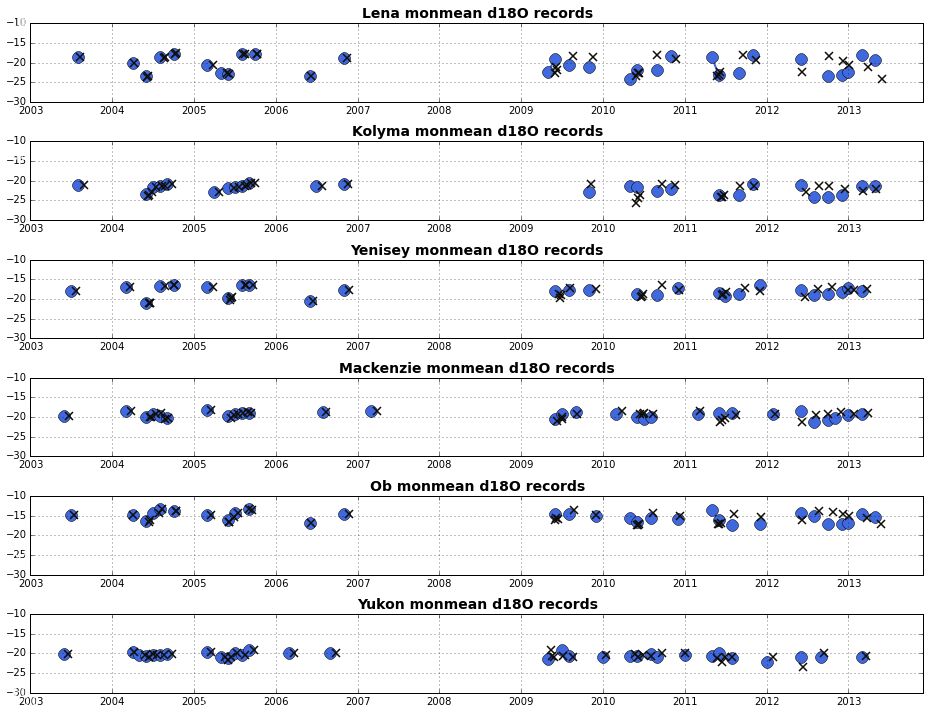

In [58]:
fig, AX = mutifig6()
for i in range(6):
    AX[i].grid()
#
AX[0].plot(Lena_monmean, Lena_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[0].plot(Lena_time, Lena_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[0].set_xlim(Lena_monmean[0], Lena_monmean[-1]); AX[0].set_ylim(-30, -10)
AX[0].set_title('Lena monmean d18O records', fontsize=14, fontweight='bold')
#
AX[1].plot(Kolyma_monmean, Kolyma_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[1].plot(Kolyma_time, Kolyma_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[1].set_xlim(Kolyma_monmean[0], Kolyma_monmean[-1]); AX[1].set_ylim(-30, -10)
AX[1].set_title('Kolyma monmean d18O records', fontsize=14, fontweight='bold')
#
AX[2].plot(Yenisey_monmean, Yenisey_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[2].plot(Yenisey_time, Yenisey_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[2].set_xlim(Yenisey_monmean[0], Yenisey_monmean[-1]); AX[2].set_ylim(-30, -10)
AX[2].set_title('Yenisey monmean d18O records', fontsize=14, fontweight='bold')
#
AX[3].plot(Mackenzie_monmean, Mackenzie_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[3].plot(Mackenzie_time, Mackenzie_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[3].set_xlim(Mackenzie_monmean[0], Mackenzie_monmean[-1]); AX[3].set_ylim(-30, -10)
AX[3].set_title('Mackenzie monmean d18O records', fontsize=14, fontweight='bold')
#
AX[4].plot(Ob_monmean, Ob_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[4].plot(Ob_time, Ob_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[4].set_xlim(Ob_monmean[0], Ob_monmean[-1]); AX[4].set_ylim(-30, -10)
AX[4].set_title('Ob monmean d18O records', fontsize=14, fontweight='bold')
#
AX[5].plot(Yukon_monmean, Yukon_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[5].plot(Yukon_time, Yukon_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[5].set_xlim(Yukon_monmean[0], Yukon_monmean[-1]); AX[5].set_ylim(-30, -10)
AX[5].set_title('Yukon monmean d18O records', fontsize=14, fontweight='bold')

In [32]:
Lena_d18O_seasonal, Lena_bin_count_seasonal = seasonal_character(Lena_time, Lena_d18O)
Kolyma_d18O_seasonal, _ = seasonal_character(Kolyma_time, Kolyma_d18O)
Yenisey_d18O_seasonal, _ = seasonal_character(Yenisey_time, Yenisey_d18O)
Mackenzie_d18O_seasonal, Mackenzie_bin_count_seasonal = seasonal_character(Mackenzie_time, Mackenzie_d18O)
Ob_d18O_seasonal, _ = seasonal_character(Ob_time, Ob_d18O)
Yukon_d18O_seasonal, _ = seasonal_character(Yukon_time, Yukon_d18O)

In [33]:
t = np.arange(1, 13)

In [34]:
alld18O = np.empty([6, 12])
alld18O[0, :] = Lena_d18O_seasonal/np.nanmean(Lena_d18O_seasonal)
alld18O[1, :] = Kolyma_d18O_seasonal/np.nanmean(Kolyma_d18O_seasonal)
alld18O[2, :] = Yenisey_d18O_seasonal/np.nanmean(Yenisey_d18O_seasonal)
alld18O[3, :] = Mackenzie_d18O_seasonal/np.nanmean(Mackenzie_d18O_seasonal)
alld18O[4, :] = Ob_d18O_seasonal/np.nanmean(Ob_d18O_seasonal)
alld18O[5, :] = Yukon_d18O_seasonal/np.nanmean(Yukon_d18O_seasonal)

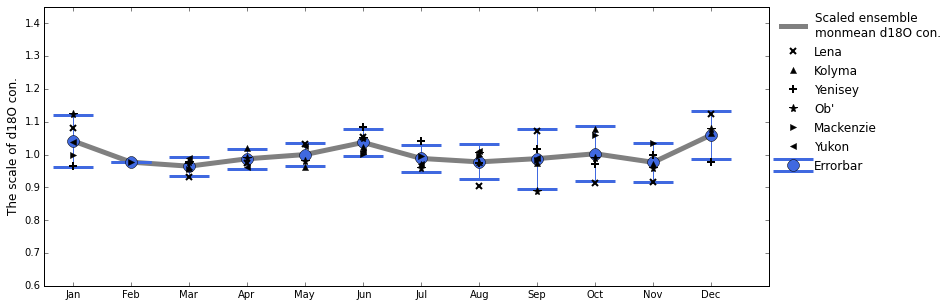

In [62]:
meand18O = np.nanmean(alld18O, 0); maxd18O = np.nanmax(alld18O, 0); mind18O = np.nanmin(alld18O, 0)
errbar = (maxd18O-mind18O)/2; errbar[mind18O==maxd18O]=np.nan
fig = plt.figure(figsize=(13, 5))
ax = fig.gca()
ax.plot(t, meand18O, '-', color='gray', linewidth=5, label='Scaled ensemble\nmonmean d18O con.')
ax.errorbar(t, meand18O, yerr=(maxd18O-mind18O)/2, fmt='o', ms=12, mfc=RB, ecolor=RB, capthick=3, capsize=20, label='Errorbar');
ax.plot(t, alld18O[0, :].T, 'x', ms=6, mew=2, color='k', label = 'Lena');
ax.plot(t, alld18O[1, :].T, '^', ms=6, mew=0.5, color='k', label = 'Kolyma');
ax.plot(t, alld18O[2, :].T, '+', ms=8, mew=2, color='k', label = 'Yenisey');
ax.plot(t, alld18O[4, :].T, '*', ms=8, mew=1, color='k', label = "Ob'");
ax.plot(t, alld18O[3, :].T, '>', ms=6, mew=0.5, color='k', label = 'Mackenzie');
ax.plot(t, alld18O[5, :].T, '<', ms=6, mew=0.5, color='k', label = 'Yukon');
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)  
ax.set_ylabel('The scale of d18O con.', fontsize=12)
ax.set_xlim(0.5, 13); ax.set_ylim(0.6, 1.45)
ax.set_xticks(range(1, 13)); ax.set_xticklabels(Mon);

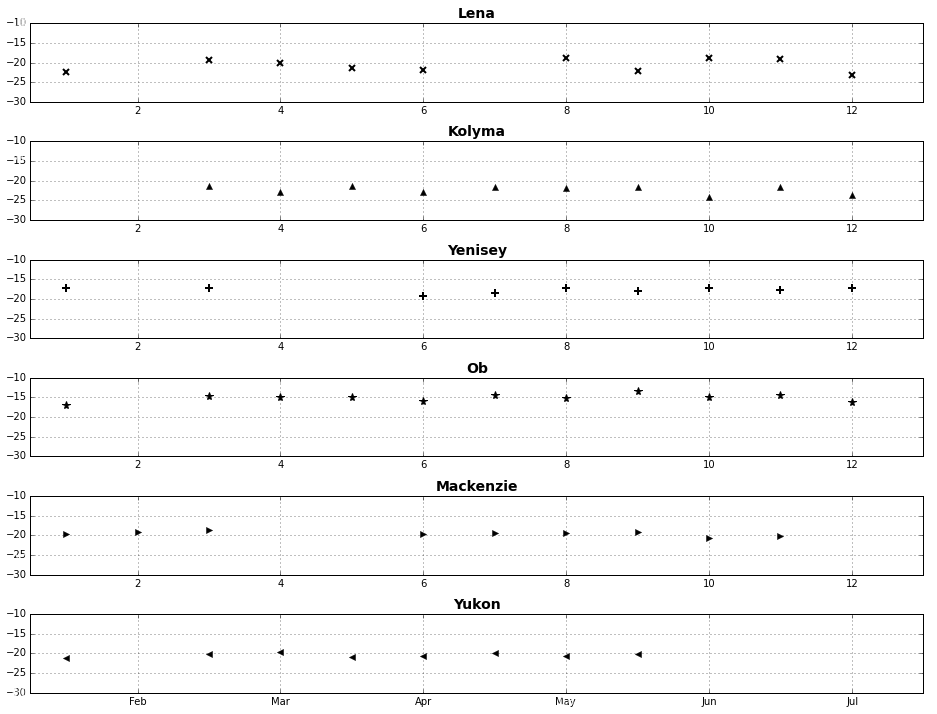

In [61]:
fig = plt.figure(figsize=(13, 5))
fig, AX = mutifig6()
for i in range(6):
    AX[i].grid()
    AX[i].set_xlim(0.5, 13); AX[i].set_ylim(-30, -10)
#
AX[0].plot(t, Lena_d18O_seasonal, 'x', ms=6, mew=2, color='k', label = 'Lena')
AX[0].set_title('Lena', fontsize=14, fontweight='bold')
AX[1].plot(t, Kolyma_d18O_seasonal, '^', ms=6, mew=0.5, color='k', label = 'Kolyma');
AX[1].set_title('Kolyma', fontsize=14, fontweight='bold')
AX[2].plot(t, Yenisey_d18O_seasonal, '+', ms=8, mew=2, color='k', label = 'Yenisey');
AX[2].set_title('Yenisey', fontsize=14, fontweight='bold')
AX[3].plot(t, Ob_d18O_seasonal, '*', ms=8, mew=1, color='k', label = "Ob'");
AX[3].set_title('Ob', fontsize=14, fontweight='bold')
AX[4].plot(t, Mackenzie_d18O_seasonal, '>', ms=6, mew=0.5, color='k', label = 'Mackenzie');
AX[4].set_title('Mackenzie', fontsize=14, fontweight='bold')
AX[5].plot(t, Yukon_d18O_seasonal, '<', ms=6, mew=0.5, color='k', label = 'Yukon');
AX[5].set_title('Yukon', fontsize=14, fontweight='bold')
#LG = AX[6].legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False) 
AX[5].set_xticklabels(Mon);